In [32]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [33]:
df = pd.read_csv('../../data/patches/lp_pisite_atom.csv')
df['percentage_interaction'] = df['interaction_site']/df['residues_in_patch']
df['random'] = df['random']/df['residues_in_patch']

In [34]:
len(df[df['rank'] == 1])

4255

In [38]:
max(df[df['rank'] == 1]['size'])

16685.702713139126

/home/jan/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/jan/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


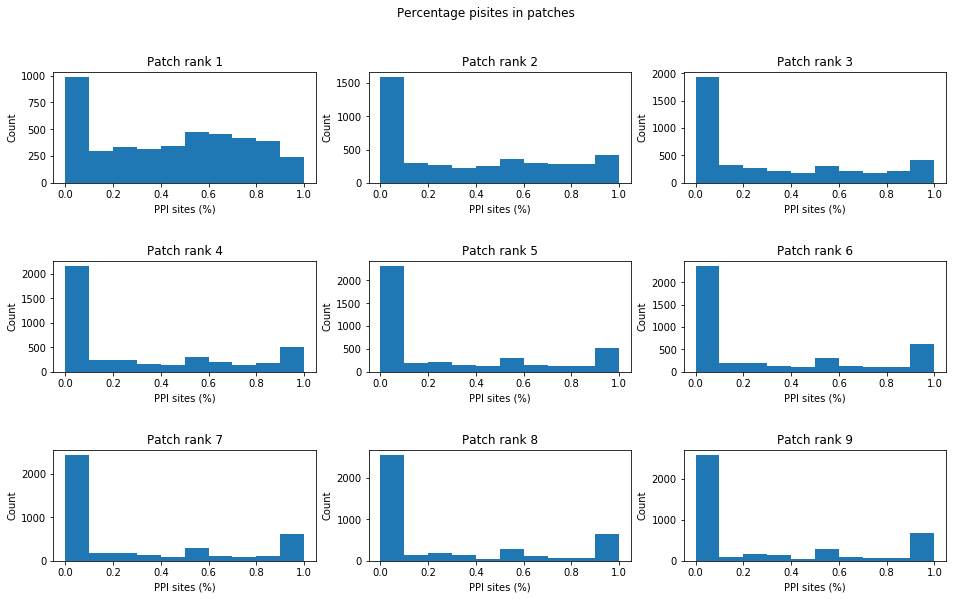

In [35]:
x, y = 3, 3
fig, axs = plt.subplots(x, y, figsize=(16, 9))
fig.suptitle('Percentage pisites in patches')

for i in range(x):
    for j in range(y):
        axs[i, j].hist(df[df['rank'] == i*3+j+1]['percentage_interaction'])
        axs[i, j].set_title('Patch rank '+str(i*3+j+1))
        
for ax in axs.flat:
    ax.set(xlabel='PPI sites (%)', ylabel='Count')
    
plt.subplots_adjust(hspace=.7)

In [25]:
df[df['rank'] == 1]['residues_in_patch'].mean()

26.04807009235141

In [26]:
df[df['rank'] == 1]['size'].mean()

1055.5481580174585

In [29]:
df.groupby('rank')['size'].mean()

rank
1.0     1055.548158
2.0      531.906896
3.0      375.032208
4.0      296.358162
5.0      245.971827
6.0      211.888212
7.0      186.985360
8.0      167.774202
9.0      152.277640
10.0     139.491847
11.0     128.610386
12.0     119.403885
13.0     111.537021
14.0     104.566546
15.0      98.338408
16.0      92.998389
17.0      88.115519
18.0      83.842753
19.0      79.917532
20.0      76.435856
Name: size, dtype: float64

In [30]:
from scipy.stats import ttest_ind
from scipy.stats import wilcoxon

for x in range(1,21):
    print('rank '+str(x),wilcoxon(df[df['rank'] == x]['percentage_interaction'],df[df['rank'] == x]['random']))

rank 1 WilcoxonResult(statistic=1189891.5, pvalue=1.9054026739748244e-288)
rank 2 WilcoxonResult(statistic=1978377.0, pvalue=2.953960493605615e-88)
rank 3 WilcoxonResult(statistic=2349455.0, pvalue=7.964978370702368e-15)
rank 4 WilcoxonResult(statistic=2200643.0, pvalue=4.4817036188546194e-07)
rank 5 WilcoxonResult(statistic=2107344.0, pvalue=0.03749097098813291)
rank 6 WilcoxonResult(statistic=1859962.5, pvalue=0.00316990421958966)
rank 7 WilcoxonResult(statistic=1751734.0, pvalue=0.3105426353044459)
rank 8 WilcoxonResult(statistic=1625117.5, pvalue=0.6592882970603797)
rank 9 WilcoxonResult(statistic=1412676.0, pvalue=0.10531292114797208)
rank 10 WilcoxonResult(statistic=1366185.0, pvalue=0.5024782058405851)
rank 11 WilcoxonResult(statistic=1214881.5, pvalue=0.039501404172034946)
rank 12 WilcoxonResult(statistic=1130231.0, pvalue=0.346357208011971)
rank 13 WilcoxonResult(statistic=1079228.0, pvalue=0.33059094657945665)
rank 14 WilcoxonResult(statistic=974271.0, pvalue=0.00611805313721

/home/jan/anaconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:2866: RuntimeWarning: invalid value encountered in greater
  r_plus = np.sum((d > 0) * r, axis=0)
/home/jan/anaconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:2867: RuntimeWarning: invalid value encountered in less
  r_minus = np.sum((d < 0) * r, axis=0)


In [31]:
for x in range(1,21):
    avg_correct = df[df['rank'] == x]['percentage_interaction'].mean()
    avg_random_correct = df[df['rank'] == x]['random'].mean()
    print('rank '+str(x), avg_correct, avg_random_correct)

rank 1 0.4313658531529145 0.25657257763498165
rank 2 0.3642209449135122 inf
rank 3 0.30633651809331475 inf
rank 4 0.2950238918532303 0.2596588470498395
rank 5 0.2788917760794455 0.2611171676672038
rank 6 0.28153468187181213 0.2567319406594893
rank 7 0.2691247695029183 0.2576213688073431
rank 8 0.2618722267015144 0.2612846620694876
rank 9 0.26497840617649 0.2533483955901019
rank 10 0.25189077430618173 0.2562755708996861
rank 11 0.25750675823942637 0.24412323732298347
rank 12 0.25113241805329517 0.2467216883714744
rank 13 0.24423538186966226 0.253644650682411
rank 14 0.26104701006819925 0.24372405588882598
rank 15 0.240998276193757 0.26057957863912
rank 16 0.24424803436305959 0.2555321797674232
rank 17 0.2410101056739714 0.24844194954038956
rank 18 0.2509600845389877 0.24144446161826524
rank 19 0.24763797769943835 0.24619502106848484
rank 20 0.2496144600391822 0.24433729667840395


In [134]:
df['random'].mean()

0.22501765097524593

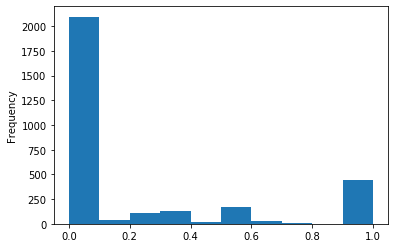

In [114]:
df[df['rank'] == 10]['random'].plot.hist()

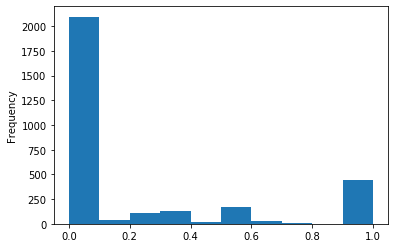

In [117]:
df[df['rank'] == 10]['random'].plot.hist()

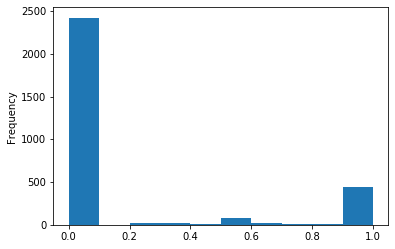

In [118]:
df[df['rank'] == 10]['percentage_interaction'].plot.hist()